## Assessment 04

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import datetime as dt
import squarify
import tensorflow as tf
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
import pickle
import gzip
from urllib.request import urlopen

import data:

In [3]:
start = dt.datetime.now()
print("Reading df1")
df1 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS1.zip",header=None)
print("Reading df2")
df2 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS2.zip",header=None)
print("Reading df3")
df3 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS3.zip",header=None)
print("Reading df4")
df4 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS4.zip",header=None)
print("Data fetched in:" ,dt.datetime.now()-start)

Reading df1


G:\Programs\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading df2


G:\Programs\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading df3
Reading df4
Data fetched in: 0:00:54.261237


Merge data together and add column names

In [4]:
df = pd.concat([df1,df2,df3,df4],ignore_index=True)
df.columns = ['source_ip', 'source_port', 'dest_ip', 'dest_port', 'proto', 'state', 'duration', 'source_bytes', 'dest_bytes', 'source_ttl',
             'dest_ttl', 'source_loss', 'dest_loss', 'service', 'source_load', 'dest_load', 'source_pkts', 'dest_pkts', 'source_TP_win', 'dest_TP_win', 
             'source_tcp_bn', 'dest_tcp_bn', 'source_mean_sz', 'dest_mean_sz', 'trans_depth', 'res_bdy_len', 'source_jitter', 'dest_jitter', 'start_time',
             'last_time', 'source_int_pk_time', 'dest_int_pk_time', 'tcp_rtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'count_state_ttl', 
             'count_flw_http_mthd', 'is_ftp_login', 'count_ftp_cmd', 'count_srv_source', 'count_srv_dest', 'count_dest_ltm',
             'count_source_ltm', 'count_source_destport_ltm', 'count_dest_sourceport_ltm', 'counts_dest_source_ltm', 'attack_cat', 'Label']
df.head(10)

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
5,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0
6,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,12,7,1,2,2,1,1,NaN,0
7,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,NaN,0
8,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,...,0,6,7,3,1,1,1,1,NaN,0
9,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,31,...,0,6,7,2,1,1,1,1,NaN,0


In [5]:
df.tail()

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0
2540046,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,...,,1,1,2,4,2,2,2,Exploits,1


In [6]:
df.shape

(2540047, 49)

In [7]:
df_1 = df.iloc[:,0:16]
df_2 = df.iloc[:,16:32]
df_3 = df.iloc[:,32:49]
df_1.head()

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,dest_ttl,source_loss,dest_loss,service,source_load,dest_load
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250


In [8]:
df_2.head()

,source_pkts,dest_pkts,source_TP_win,dest_TP_win,source_tcp_bn,dest_tcp_bn,source_mean_sz,dest_mean_sz,trans_depth,res_bdy_len,source_jitter,dest_jitter,start_time,last_time,source_int_pk_time,dest_int_pk_time
0,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000
1,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333
2,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000
3,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000
4,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000


In [9]:
df.iloc[:,14:18].head()

,source_load,dest_load,source_pkts,dest_pkts
0,500473.93750,621800.93750,2,2
1,87676.08594,50480.17188,4,4
2,521894.53130,636282.37500,2,2
3,436724.56250,542597.18750,2,2
4,499572.25000,609067.56250,2,2


In [10]:
df_3.head()

,tcp_rtt,synack,ackdat,is_sm_ips_ports,count_state_ttl,count_flw_http_mthd,is_ftp_login,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [11]:
df.iloc[:,30:35].head()

,source_int_pk_time,dest_int_pk_time,tcp_rtt,synack,ackdat
0,0.017,0.013000,0.0,0.0,0.0
1,7.005,7.564333,0.0,0.0,0.0
2,0.017,0.013000,0.0,0.0,0.0
3,0.043,0.014000,0.0,0.0,0.0
4,0.005,0.003000,0.0,0.0,0.0


In [12]:
print("shape of 1st slice:")
print(df_1.shape)
print("shape of 2nd slice:")
print(df_2.shape)
print("shape of 3rd slice:")
print(df_3.shape)

shape of 1st slice:
(2540047, 16)
shape of 2nd slice:
(2540047, 16)
shape of 3rd slice:
(2540047, 17)


In [13]:
df_1.describe()

,duration,source_bytes,dest_bytes,source_ttl,dest_ttl,source_loss,dest_loss,source_load,dest_load
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08


In [14]:
df_2.describe()

,source_pkts,dest_pkts,source_TP_win,dest_TP_win,source_tcp_bn,dest_tcp_bn,source_mean_sz,dest_mean_sz,trans_depth,res_bdy_len,source_jitter,dest_jitter,start_time,last_time,source_int_pk_time,dest_int_pk_time
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,3.328884e+01,4.272664e+01,1.500887e+02,1.497459e+02,1.261701e+09,1.261766e+09,1.242536e+02,2.766719e+02,8.325318e-02,4.242118e+03,1.589037e+03,7.300755e+02,1.423261e+09,1.423261e+09,1.933225e+02,7.882476e+01
std,7.628388e+01,1.215020e+02,1.254824e+02,1.255438e+02,1.422027e+09,1.422139e+09,1.519162e+02,3.356166e+02,3.500045e-01,4.750053e+04,1.691036e+04,3.438558e+03,1.134449e+06,1.134448e+06,2.779163e+03,1.433191e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421927e+09,1.421927e+09,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421952e+09,1.421952e+09,9.000000e-03,6.000000e-03
50%,1.200000e+01,1.200000e+01,2.550000e+02,2.550000e+02,6.397250e+08,6.384172e+08,7.300000e+01,8.900000e+01,0.000000e+00,0.000000e+00,1.912490e+01,2.653561e+00,1.424227e+09,1.424227e+09,4.682620e-01,4.147550e-01
75%,4.400000e+01,4.200000e+01,2.550000e+02,2.550000e+02,2.467160e+09,2.469411e+09,1.320000e+02,5.650000e+02,0.000000e+00,0.000000e+00,4.137935e+02,6.350857e+01,1.424245e+09,1.424245e+09,7.351427e+00,6.202100e+00
max,1.064600e+04,1.101800e+04,2.550000e+02,2.550000e+02,4.294959e+09,4.294954e+09,1.504000e+03,1.500000e+03,1.720000e+02,6.558056e+06,1.483831e+06,7.812211e+05,1.424262e+09,1.424262e+09,8.437150e+04,5.948532e+04


In [15]:
df_3.describe()

,tcp_rtt,synack,ackdat,is_sm_ips_ports,count_state_ttl,count_flw_http_mthd,is_ftp_login,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,Label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.180475e-03,3.287595e-03,2.892880e-03,1.651544e-03,2.611546e-01,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,4.615863e-02,2.593570e-02,2.394668e-02,4.060563e-02,6.830974e-01,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,6.130000e-04,4.830000e-04,1.220000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,7.020000e-04,5.540000e-04,1.400000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,1.003751e+01,4.525272e+00,5.512234e+00,1.000000e+00,6.000000e+00,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [16]:
dfmax = df.max()

In [17]:
dfmax

source_ip                     59.166.0.9
dest_ip                       59.166.0.9
proto                               zero
state                                 no
duration                         8786.64
source_bytes                    14355774
dest_bytes                      14657531
source_ttl                           255
dest_ttl                             254
source_loss                         5319
dest_loss                           5507
service                              ssl
source_load                    5.988e+09
dest_load                    1.28762e+08
source_pkts                        10646
dest_pkts                          11018
source_TP_win                        255
dest_TP_win                          255
source_tcp_bn                 4294958913
dest_tcp_bn                   4294953724
source_mean_sz                      1504
dest_mean_sz                        1500
trans_depth                          172
res_bdy_len                      6558056
source_jitter   

In [18]:
[np.finfo(np.float32).max, np.finfo(np.float64).max]

[3.4028235e+38, 1.7976931348623157e+308]

In [19]:
def bitcheckmax(data):
    for i in data:
        count = 0
        fail = False
        if isinstance(i,str) == True:
            pass
        else:
            j = float(i)
            count = count+1
            if j <= np.finfo(np.float64).max:
                pass
            else:
                print("Fails 64 bit check at row: " + str(count))
                fail = True
                break
    if fail == False:
        print("Passes 64 bit check.")
    for i in data:
        count = 0
        fail = False
        if isinstance(i,str) == True:
            pass
        else:
            j = float(i)
            count = count+1
            if j <= np.finfo(np.float32).max:
                pass
            else:
                print("Fails 32 bit check at row: " + str(count))
                fail = True
                break
    if fail == False:
        print("Passes 32 bit check.")

In [20]:
bitcheckmax(dfmax)

Passes 64 bit check.
Passes 32 bit check.


In [21]:
df

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [22]:
df['attack_cat'] = df['attack_cat'].fillna('Normal')
df.head()

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,Normal,0


In [23]:
attackcount = pd.DataFrame(df['attack_cat'].value_counts())
attackcount

,attack_cat
Normal,2218764
Generic,215481
Exploits,44525
Fuzzers,19195
DoS,16353
Reconnaissance,12228
Fuzzers,5051
Analysis,2677
Backdoor,1795
Reconnaissance,1759


In [24]:
ac = []
for i in attackcount.index:
    ac.append(i)
ac

['Normal',
 'Generic',
 'Exploits',
 ' Fuzzers ',
 'DoS',
 ' Reconnaissance ',
 ' Fuzzers',
 'Analysis',
 'Backdoor',
 'Reconnaissance',
 ' Shellcode ',
 'Backdoors',
 'Shellcode',
 'Worms']

In [25]:
an = attackcount["attack_cat"].tolist()

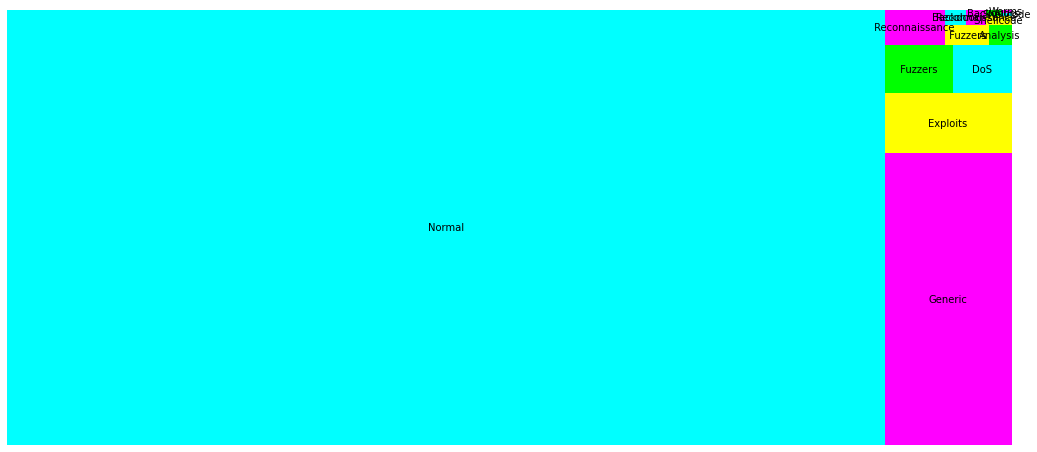

In [26]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(18,8)
squarify.plot(label=ac,sizes=an, color = ["cyan","magenta","yellow","lime"])
plt.axis("off")
plt.show()

In [27]:
l = []
colnames = df.columns

for name in colnames:
    if df[name].isnull().values.any():
        l.append(name)
        
print('The columns with missing values in them are: ' + str(l))

The columns with missing values in them are: ['count_flw_http_mthd', 'is_ftp_login']


In [28]:
null_1 = df["count_flw_http_mthd"].isnull()
null_2 = df["is_ftp_login"].isnull()
null_3 = df["count_ftp_cmd"].isnull()

In [29]:
#def nullno(data):
#    missing = 0
#    for i in range(len(null_1)):
#        y = data.loc[i]
#        if y == True:
#            missing = missing + 1
#        else:
#            pass
#    print("Total missing data values in this data is:" +str(missing))

In [30]:
range(len(null_1))

range(0, 2540047)

In [31]:
print("percentage of missing data in count_flw_http_mthd column:" + str(df["count_flw_http_mthd"].isnull().sum()*100/len(df)))
print("percentage of missing data in is_ftp_login column:" + str(df["is_ftp_login"].isnull().sum()*100/len(df)))
print("percentage of missing data in count_ftp_cmd column:" + str(df["count_ftp_cmd"].isnull().sum()*100/len(df)))

percentage of missing data in count_flw_http_mthd column:53.07559269572571
percentage of missing data in is_ftp_login column:56.29340716923742
percentage of missing data in count_ftp_cmd column:0.0


In [32]:
df = df.fillna(0)

In [33]:
print("percentage of missing data in count_flw_http_mthd column:" + str(df["count_flw_http_mthd"].isnull().sum()*100/len(df)))
print("percentage of missing data in is_ftp_login column:" + str(df["is_ftp_login"].isnull().sum()*100/len(df)))
print("percentage of missing data in count_ftp_cmd column:" + str(df["count_ftp_cmd"].isnull().sum()*100/len(df)))

percentage of missing data in count_flw_http_mthd column:0.0
percentage of missing data in is_ftp_login column:0.0
percentage of missing data in count_ftp_cmd column:0.0


In [34]:
df['count_ftp_cmd'] = df['count_ftp_cmd'].apply(pd.to_numeric,errors="coerce")

In [35]:
print("percentage of missing data in count_flw_http_mthd column:" + str(df["count_flw_http_mthd"].isnull().sum()*100/len(df)))
print("percentage of missing data in is_ftp_login column:" + str(df["is_ftp_login"].isnull().sum()*100/len(df)))
print("percentage of missing data in count_ftp_cmd column:" + str(df["count_ftp_cmd"].isnull().sum()*100/len(df)))

percentage of missing data in count_flw_http_mthd column:0.0
percentage of missing data in is_ftp_login column:0.0
percentage of missing data in count_ftp_cmd column:56.29340716923742


In [36]:
df = df.fillna(0)
print("percentage of missing data in count_flw_http_mthd column:" + str(df["count_flw_http_mthd"].isnull().sum()*100/len(df)))
print("percentage of missing data in is_ftp_login column:" + str(df["is_ftp_login"].isnull().sum()*100/len(df)))
print("percentage of missing data in count_ftp_cmd column:" + str(df["count_ftp_cmd"].isnull().sum()*100/len(df)))

percentage of missing data in count_flw_http_mthd column:0.0
percentage of missing data in is_ftp_login column:0.0
percentage of missing data in count_ftp_cmd column:0.0


In [37]:
df

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0.0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0.0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0.0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0.0,7,9,1,1,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,0.0,1,2,3,3,1,1,3,Normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2.0,2,2,2,2,2,2,2,Normal,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2.0,2,2,4,2,2,2,2,Normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,0.0,1,1,2,4,2,2,2,Normal,0


In [38]:
for i in range(0,49):
    print(df.columns[i])
    print(type(df.iloc[1,i]))

source_ip
<class 'str'>
source_port
<class 'int'>
dest_ip
<class 'str'>
dest_port
<class 'str'>
proto
<class 'str'>
state
<class 'str'>
duration
<class 'numpy.float64'>
source_bytes
<class 'numpy.int64'>
dest_bytes
<class 'numpy.int64'>
source_ttl
<class 'numpy.int64'>
dest_ttl
<class 'numpy.int64'>
source_loss
<class 'numpy.int64'>
dest_loss
<class 'numpy.int64'>
service
<class 'str'>
source_load
<class 'numpy.float64'>
dest_load
<class 'numpy.float64'>
source_pkts
<class 'numpy.int64'>
dest_pkts
<class 'numpy.int64'>
source_TP_win
<class 'numpy.int64'>
dest_TP_win
<class 'numpy.int64'>
source_tcp_bn
<class 'numpy.int64'>
dest_tcp_bn
<class 'numpy.int64'>
source_mean_sz
<class 'numpy.int64'>
dest_mean_sz
<class 'numpy.int64'>
trans_depth
<class 'numpy.int64'>
res_bdy_len
<class 'numpy.int64'>
source_jitter
<class 'numpy.float64'>
dest_jitter
<class 'numpy.float64'>
start_time
<class 'numpy.int64'>
last_time
<class 'numpy.int64'>
source_int_pk_time
<class 'numpy.float64'>
dest_int_pk_t

In [39]:
df.dtypes

source_ip                     object
source_port                   object
dest_ip                       object
dest_port                     object
proto                         object
state                         object
duration                     float64
source_bytes                   int64
dest_bytes                     int64
source_ttl                     int64
dest_ttl                       int64
source_loss                    int64
dest_loss                      int64
service                       object
source_load                  float64
dest_load                    float64
source_pkts                    int64
dest_pkts                      int64
source_TP_win                  int64
dest_TP_win                    int64
source_tcp_bn                  int64
dest_tcp_bn                    int64
source_mean_sz                 int64
dest_mean_sz                   int64
trans_depth                    int64
res_bdy_len                    int64
source_jitter                float64
d

In [40]:
df['attack_cat'] = df['attack_cat'].map({'Normal': 'Normal', 'Exploits': 'Exploits', ' Fuzzers ': 'Fuzzers', 'DoS': 'DoS',
                                          ' Reconnaissance ': 'Reconnaissance', ' Fuzzers': 'Fuzzers', 'Analysis': 'Analysis',
                                         'Backdoor': 'Backdoor', 'Reconnaissance': 'Reconnaissance',  ' Shellcode ': 'Shellcode',
                                         'Backdoors': 'Backdoor', 'Shellcode': 'Shellcode',  'Worms': 'Worms', 'Generic': 'Generic'})
df.groupby('attack_cat').size()

attack_cat
Analysis             2677
Backdoor             2329
DoS                 16353
Exploits            44525
Fuzzers             24246
Generic            215481
Normal            2218764
Reconnaissance      13987
Shellcode            1511
Worms                 174
dtype: int64

In [41]:
df = df.drop('Label',axis=1)
df_source_ip = pd.DataFrame(df['source_ip'])
df_source_port = pd.DataFrame(df['source_port'])
df_dest_ip = pd.DataFrame(df['dest_ip'])
df_dest_port = pd.DataFrame(df['dest_port'])
df_proto = pd.DataFrame(df['proto'])
df_state = pd.DataFrame(df['state'])
df_service = pd.DataFrame(df['service'])
df_count_ftp_cmd = pd.DataFrame(df['count_ftp_cmd'])
df_attack_cat = pd.DataFrame(df['attack_cat'])

In [42]:
# we now create dictionaries to allow us to map onto the data frame

sips = df.source_ip.unique()
sip_dict = dict(zip(sips,range(len(sips))))

sp = df.source_port.unique()
sp_dict = dict(zip(sp,range(len(sp))))
               
dips = df.dest_ip.unique()
dip_dict = dict(zip(dips,range(len(dips))))

dp = df.dest_port.unique()
dp_dict = dict(zip(dp,range(len(dp))))

p = df.proto.unique()
p_dict = dict(zip(p,range(len(p))))

states = df.state.unique()
state_dict = dict(zip(states,range(len(states))))

services = df.service.unique()
service_dict = dict(zip(services,range(len(services))))

cfc = df.count_ftp_cmd.unique()
cfc_dict = dict(zip(cfc,range(len(cfc))))

ac = df.attack_cat.unique()
ac_dict = dict(zip(ac,range(len(ac))))

In [43]:
df['source_ip_int'] = df['source_ip'].map(sip_dict)
df['source_port_int'] = df['source_port'].map(sp_dict)
df['dest_ip_int'] = df['dest_ip'].map(dip_dict)
df['dest_port_int'] = df['dest_port'].map(dp_dict)
df['proto_int'] = df['proto'].map(p_dict)
df['state_int'] = df['state'].map(state_dict)
df['service_int'] = df['service'].map(service_dict)
df['count_ftp_cmd_int'] = df['count_ftp_cmd'].map(cfc_dict)
df['attack_cat_int'] = df['attack_cat'].map(ac_dict)

In [44]:
df = df.drop('source_ip',axis=1)
df = df.drop('source_port',axis=1)
df = df.drop('dest_ip',axis=1)
df = df.drop('dest_port',axis=1)
df = df.drop('proto',axis=1)
df = df.drop('state',axis=1)
df = df.drop('service',axis=1)
df = df.drop('count_ftp_cmd',axis=1)
df = df.drop('attack_cat',axis=1)

In [45]:
df.dtypes

duration                     float64
source_bytes                   int64
dest_bytes                     int64
source_ttl                     int64
dest_ttl                       int64
source_loss                    int64
dest_loss                      int64
source_load                  float64
dest_load                    float64
source_pkts                    int64
dest_pkts                      int64
source_TP_win                  int64
dest_TP_win                    int64
source_tcp_bn                  int64
dest_tcp_bn                    int64
source_mean_sz                 int64
dest_mean_sz                   int64
trans_depth                    int64
res_bdy_len                    int64
source_jitter                float64
dest_jitter                  float64
start_time                     int64
last_time                      int64
source_int_pk_time           float64
dest_int_pk_time             float64
tcp_rtt                      float64
synack                       float64
a

In [46]:
l = []
colnames = df.columns

for name in colnames:
    if df[name].isnull().values.any():
        l.append(name)
        
print('The columns with na/nan values in them are: ' + str(l))

The columns with na/nan values in them are: []


In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def preprocess(data,scaling=None):
    data = data.astype(np.float)
    if(scaling == None):
        scaling = StandardScaler()
        datat=scaling.fit_transform(data)
    else:
        datat=scaling.transform(data)
    return(datat,scaling)

In [48]:
Y = df['attack_cat_int']
X = df.drop('attack_cat_int',axis=1)

In [50]:
X_scaled, scaling = preprocess(X.values)
print(X.shape)
print(X_scaled.shape)
print(Y.shape)

(2540047, 47)
(2540047, 47)
(2540047,)


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.1, random_state = 10)

In [74]:
pickle.dump(X_train,open("X_train.pkl","wb"))
pickle.dump(X_test,open("X_test.pkl","wb"))
pickle.dump(Y_train,open("Y_train.pkl","wb"))
pickle.dump(Y_train,open("Y_test.pkl","wb"))

In [101]:
fp=gzip.open('X_train.pkl.gz','wb')
pickle.dump(X_train,fp)
fp.close()
fp=gzip.open('X_test.pkl.gz','wb')
pickle.dump(X_test,fp)
fp.close()
fp=gzip.open('Y_train.pkl.gz','wb')
pickle.dump(Y_train,fp)
fp.close()
fp=gzip.open('Y_test.pkl.gz','wb')
pickle.dump(Y_test,fp)
fp.close()

In [106]:
#x_tr = pickle.load(open("X_train.pkl","rb"))
fp=gzip.open('X_train.pkl.gz','rb')
x_tr=pickle.load(fp)
fp.close()

In [107]:
y = x_tr == X_train
y.all()

True

In [79]:
import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense

## No hidden layers

In [90]:
X_train.shape[1]

47

In [80]:
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='elu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='elu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                250       
Total params: 1,402
Trainable params: 1,402
Non-trainable params: 0
_________________________________________________________________


In [95]:
def compile_fit(model, max_epochs, step_size):
    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    epochs_list=list()
    trainacc=list()
    testacc=list()
    
    epochs = 0
    
    for i in range(0, int(max_epochs / step_size)):
        
        print("epoch : " + str(epochs))
        
        model.fit(X_train, Y_train, epochs=step_size, batch_size=256, validation_data=(X_test, Y_test))
        trainscores = model.evaluate(X_train, Y_train)
        testscores = model.evaluate(X_test, Y_test)
        
        trainacc.append(trainscores[1])
        testacc.append(testscores[1])
        epochs = epochs + step_size
        epochs_list.append(epochs)
        
    return epochs_list, trainacc, testacc

In [97]:
epochs, trainacc, testacc = compile_fit(model, 6,2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                250       
Total params: 1,402
Trainable params: 1,402
Non-trainable params: 0
_________________________________________________________________
epoch : 0
Train on 2286042 samples, validate on 254005 samples
Epoch 1/2
2286042/2286042 [==============================] - 12s 5us/step - loss: 0.0582 - accuracy: 0.9768 - val_loss: 0.0577 - val_accuracy: 0.9773
Epoch 2/2
254005/254005 [==============================] - 3s 12us/step
epoch : 2
Train on 2286042 samples, validate on 254005 samples
Epoch 1/2
2286042/2286042 [==============================] - 12s 5us/step - loss: 0.0573 - accuracy: 0.9772 - val_loss: 0.0571 - val_accuracy: 0.9771
Epoch 2/2
254005

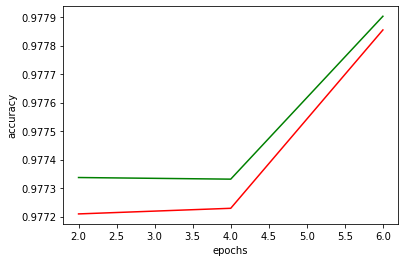

In [98]:
plt.plot(epochs, trainacc, color = 'g', label='training accuracy')
plt.plot(epochs, testacc, color = 'r', label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()